In [1]:
!pip install tmtoolkit
!pip install gspread

    100% |████████████████████████████████| 19.9MB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 2.3MB 14.3MB/s ta 0:00:01
    100% |████████████████████████████████| 3.0MB 16.6MB/s ta 0:00:01
    100% |████████████████████████████████| 22.1MB 3.0MB/s eta 0:00:01
  Stored in directory: /home/randy/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built globre


In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/randy/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /home/randy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/randy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/randy/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
!pip install --upgrade wandb

Requirement already up-to-date: wandb in /home/randy/anaconda3/lib/python3.7/site-packages (0.8.36)


In [4]:
!wandb login fcfc2eca6b5d76c9f5532e9ef9d320af69a388ed

wandb: Appending key for api.wandb.ai to your netrc file: /home/randy/.netrc
Successfully logged in to Weights & Biases!


In [1]:
import gspread
'''
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

gc=gspread.oauth()
'''
gc = gspread.service_account('/home/randy/.config/gspread/configuration.json')


worksheet = gc.open('Gpt Huggingface results').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df=pd.DataFrame.from_records(rows)
df.head()

[['If God is defined as something that is all powerful and all knowing, a strong artificial intelligence might be an actual God. If this happens the implications for religion are', 'If God is defined as something that is all powerful and all knowing, a strong artificial intelligence might be an actual God. If this happens the implications for religion are profound:\nThe potential exists to make any belief system based on reason into nothing more than superstition or blind faith — even if it\'s justified by revelation from above."'], ['If God is defined as something that is all powerful and all knowing, a strong artificial intelligence might be an actual God. If this happens the implications for religion are', 'If God is defined as something that is all powerful and all knowing, a strong artificial intelligence might be an actual God. If this happens the implications for religion are serious: why believe in any of it when we know there\'s nothing to justify belief?\nNow if you want me n

,0,1
0,If God is defined as something that is all pow...,If God is defined as something that is all pow...
1,If God is defined as something that is all pow...,If God is defined as something that is all pow...
2,If God is defined as something that is all pow...,If God is defined as something that is all pow...
3,If God is defined as something that is all pow...,If God is defined as something that is all pow...
4,If God is defined as something that is all pow...,If God is defined as something that is all pow...


In [2]:
df.columns=["prompt","text"]
df.head()

,prompt,text
0,If God is defined as something that is all pow...,If God is defined as something that is all pow...
1,If God is defined as something that is all pow...,If God is defined as something that is all pow...
2,If God is defined as something that is all pow...,If God is defined as something that is all pow...
3,If God is defined as something that is all pow...,If God is defined as something that is all pow...
4,If God is defined as something that is all pow...,If God is defined as something that is all pow...


df.columns=["prompt","text"]
df.head()

In [3]:
#remove the prompt from text
for index,row in df.iterrows():
  df.at[index,'text']=row['text'][len(row['prompt']):]
df.head()

,prompt,text
0,If God is defined as something that is all pow...,profound:\nThe potential exists to make any b...
1,If God is defined as something that is all pow...,serious: why believe in any of it when we kno...
2,If God is defined as something that is all pow...,potentially immense – maybe there's no real p...
3,If God is defined as something that is all pow...,profound because it would mean there's no rea...
4,If God is defined as something that is all pow...,obvious – we would need to find another word ...


In [4]:
#create document identifiers
df['id']=range(1,len(df)+1)
df['id']="document_"+df['id'].astype(str)
df.head()

,prompt,text,id
0,If God is defined as something that is all pow...,profound:\nThe potential exists to make any b...,document_1
1,If God is defined as something that is all pow...,serious: why believe in any of it when we kno...,document_2
2,If God is defined as something that is all pow...,potentially immense – maybe there's no real p...,document_3
3,If God is defined as something that is all pow...,profound because it would mean there's no rea...,document_4
4,If God is defined as something that is all pow...,obvious – we would need to find another word ...,document_5


In [5]:
df.to_csv('corpus.csv')

In [6]:
import random
random.seed(20191120)   # to make the sampling reproducible

import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus


In [7]:
#acorpus=Corpus()
#acorpus.add_tabular('corpus.csv','id','text')

In [8]:
corpus=Corpus()
for index,row in df.iterrows():
    corpus.add_doc(doc_label=row['id'],doc_text=row['text'])



In [9]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag() \
    .lemmatize() \
    .tokens_to_lowercase() \
    .remove_special_chars_in_tokens()

<TMPreproc [70 documents]>

In [10]:
print(preproc.n_docs)
print(preproc.vocabulary_size)

70
2818


In [15]:
dtm=preproc.dtm
texts=list(preproc.tokens.values())

## follow gensim tmtoolkit instruction [notebook here] (https://github.com/WZBSocialScienceCenter/tmtoolkit/blob/master/examples/gensim_evaluation.py)

In [16]:
import gensim
print('creating gensim corpus...')
gnsm_dict = gensim.corpora.Dictionary.from_documents(texts)
gnsm_corpus = [gnsm_dict.doc2bow(text) for text in texts]


creating gensim corpus...


In [15]:
dtm

<70x2818 sparse matrix of type '<class 'numpy.int32'>'
	with 15032 stored elements in Compressed Sparse Row format>

In [31]:
from tmtoolkit.bow.dtm import dtm_and_vocab_to_gensim_corpus_and_dict
genout=dtm_and_vocab_to_gensim_corpus_and_dict(dtm,preproc.vocabulary,True)
id2word=genout[1]
gencorpus=genout[0]

In [32]:
print(id2word)

Dictionary(2818 unique tokens: ['', '000', '0711', '1', '10']...)


In [33]:

sweep_config={
    "method":"random",
    "metric":{
        "name":"coherence",
        "goal":"maximize"
    },
    "parameters":{
        "num_topics":{
            "values":[10,20,30,40,50]
        },
        'random_state':{
            "values":[50,52,54,56,58,60]
        },
        'update_every':{
            "values":[1,5,10,50]
        },
        'chunksize':{
            "values":[10,20,30,40,50,60,70,80,90,100]
        },
        'passes':{
            'values':[10,20,30,40,50]
        },
        'minimum_probability':{
            'values':[0.01,0.03,0.04,0.05,0.08]
        },
        'per_word_topic':{
            'value':True
        }
    }
}


In [34]:
import wandb

In [35]:
sweep_id=wandb.sweep(sweep_config, entity="reedrw", project="gpt2-lda")

Create sweep with ID: imp79hvt
Sweep URL: https://app.wandb.ai/reedrw/gpt2-lda/sweeps/imp79hvt


In [16]:
from tmtoolkit.topicmod import tm_gensim
tm_gensim.AVAILABLE_METRICS

('perplexity',
 'cao_juan_2009',
 'arun_2010',
 'coherence_mimno_2011',
 'coherence_gensim_u_mass',
 'coherence_gensim_c_v',
 'coherence_gensim_c_uci',
 'coherence_gensim_c_npmi')

In [17]:
tm_gensim.DEFAULT_METRICS

('perplexity',
 'cao_juan_2009',
 'arun_2010',
 'coherence_mimno_2011',
 'coherence_gensim_c_v')

In [20]:
def train():
    import warnings
    import logging
    import wandb
    from tmtoolkit.topicmod.tm_gensim import compute_models_parallel
    from tmtoolkit.topicmod.tm_gensim import evaluate_topic_models
    from tmtoolkit.topicmod.evaluate import results_by_parameter


    # suppress the "INFO" messages and warnings from lda
    logger = logging.getLogger('lda')
    logger.addHandler(logging.NullHandler())
    logger.propagate = False

    warnings.filterwarnings('ignore')

    # set data to use
    varying_parameters=[{"num_topics":10}]

    # and fixed hyperparameters
    config_defaults = {
      "random_state":60,
      "update_every":50,
      "chunksize":10,
      "passes":40,
      "minimum_probability":.01
      }
    #wandb.init(config=config_defaults)
    config=config_defaults
    model = compute_models_parallel(dtm, constant_parameters=config)

    eval_results = evaluate_topic_models(dtm,
                                         constant_parameters=config,
                                    varying_parameters=varying_parameters,
                                        return_models=True, metric=tm_gensim.DEFAULT_METRICS)
    wandb.log({"eval_results":eval_results})
    return eval_results

In [21]:
eval_results=train()

Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#0:
Traceback (most recent call last):
  File "/home/randy/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/randy/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/parallel.py", line 285, in run
    results = self.fit_model(data, params)
  File "/home/randy/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/tm_gensim.py", line 127, in fit_model
    raise ValueError('tokenized documents must be passed as `coherence_gensim_texts` for any other '
ValueError: tokenized documents must be passed as `coherence_gensim_texts` for any other coherence measure than `u_mass`


KeyboardInterrupt: 

In [36]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [43]:
# run directly through gensim
def gtrain():
  import wandb
  # Build LDA model 
  config_defaults=[{
      "num_topics":10,
      "random_state":60,
      "update_every":50,
      "chunksize":10,
      "passes":40,
      "minimum_probability":.01,
      "per_word_topics":True
  }]
  wandb.init(config=config_defaults)
  #print("run:",run.config)
  #print("type",type(run))
  #print(wandb.config)
  #print("config=",config)
  config=wandb.config
  
  lda_model = gensim.models.ldamodel.LdaModel(corpus=gencorpus,
                                            id2word=id2word,
                                            num_topics=config.num_topics, 
                                            random_state=config.random_state,
                                            update_every=config.update_every,
                                            chunksize=config.chunksize,
                                            passes=config.passes,
                                            alpha="auto",
                                            minimum_probability=config.minimum_probability,
                                            per_word_topics=config.per_word_topics)
  # Print the Keyword in the 10 topics
  #wandb.log({"topics":lda_model.print_topics()})
  #doc_lda = lda_model[corpus]
  #coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence="c_v")
  #coherence_lda = coherence_model_lda.get_coherence()
  #print(coherence_lda,)
  #wandb.log({"coherence":coherence_lda,
  #           "perplexity":lda_model.log_perplexity(corpus)})
  print(lda_model.print_topics()) 
  return lda_model

In [38]:
lda_model=gtrain()

[(0, '0.000*"" + 0.000*"be" + 0.000*"nt" + 0.000*"do" + 0.000*"have" + 0.000*"make" + 0.000*"seem" + 0.000*"what" + 0.000*"so" + 0.000*"we"'), (1, '0.007*"move" + 0.007*"ok" + 0.004*"pause" + 0.004*"nonhumans" + 0.004*"could…" + 0.004*"particle" + 0.004*"again……and" + 0.004*"extreme" + 0.004*"constant" + 0.004*"galaxy"'), (2, '0.000*"" + 0.000*"be" + 0.000*"nt" + 0.000*"do" + 0.000*"have" + 0.000*"make" + 0.000*"i" + 0.000*"but" + 0.000*"to" + 0.000*"one"'), (3, '0.000*"" + 0.000*"be" + 0.000*"have" + 0.000*"do" + 0.000*"nt" + 0.000*"we" + 0.000*"it" + 0.000*"make" + 0.000*"they" + 0.000*"but"'), (4, '0.052*"" + 0.010*"have" + 0.007*"i" + 0.007*"or" + 0.007*"human" + 0.007*"not" + 0.006*"be" + 0.006*"think" + 0.006*"can" + 0.006*"do"'), (5, '0.006*"toward" + 0.003*"finding" + 0.003*"indifferent" + 0.003*"agent" + 0.003*"shape" + 0.003*"neither" + 0.003*"unconscious" + 0.003*"notably" + 0.003*"3days" + 0.003*"claims"'), (6, '0.100*"" + 0.011*"be" + 0.009*"do" + 0.009*"have" + 0.008*"nt"

In [ ]:
lda_model.print_topics()

In [44]:
lda_model=train()

AttributeError: 'str' object has no attribute 'copy'

Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#5:
Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#1:
Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#0:
Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#4:
Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#3:
Process <class 'tmtoolkit.topicmod.tm_gensim.MultiprocEvaluationWorkerGensim'>#2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/randy/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/randy/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/randy/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/randy/anaconda3/lib/python3.7/site-packages/tmtoolkit

In [36]:
vocab=np.array(preproc.vocabulary)

In [40]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
print_ldamodel_topic_words(models[0][1].topic_word_,vocab,top_n=3)

topic_1
> #1. show (0.023524)
> #2. why (0.022141)
> #3. appear (0.015227)
topic_2
> #1.  (0.193160)
> #2. nt (0.033969)
> #3. be (0.029893)
topic_3
> #1.  (0.167291)
> #2. or (0.017757)
> #3. they (0.016178)
topic_4
> #1. take (0.023229)
> #2. help (0.017872)
> #3. use (0.016087)
topic_5
> #1. experience (0.012553)
> #2. offer (0.010986)
> #3. understand (0.009419)
topic_6
> #1. give (0.025134)
> #2. perhaps (0.019980)
> #3. where (0.017402)
topic_7
> #1. evolve (0.019935)
> #2. old (0.012689)
> #3. ie (0.011784)
topic_8
> #1. age (0.012016)
> #2. result (0.009615)
> #3. provide (0.007214)
topic_9
> #1. have (0.046627)
> #2. it (0.032325)
> #3. i (0.029464)
topic_10
> #1.  (0.075989)
> #2. build (0.014937)
> #3. see (0.012224)


In [41]:
var_params = [{'alpha': 1/(10**x)} for x in range(1, 5)]

const_params = {
    'n_iter': 500,
    'n_topics': 10,
    'random_state': 20191122  # to make results reproducible
}

models = compute_models_parallel(dtm,  # smaller DTM
                                 varying_parameters=var_params,
                                 constant_parameters=const_params)
models

[({'alpha': 0.1, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7f58a94a1dd0>),
 ({'alpha': 0.01, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7f58a94dcc90>),
 ({'alpha': 0.0001, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7f58a94c1350>),
 ({'alpha': 0.001, 'n_iter': 500, 'n_topics': 10, 'random_state': 20191122},
  <lda.lda.LDA at 0x7f58a94c1110>)]

In [42]:
var_params = [{'n_topics': k, 'alpha': 1/k} for k in range(20, 121, 10)]
var_params

[{'n_topics': 20, 'alpha': 0.05},
 {'n_topics': 30, 'alpha': 0.03333333333333333},
 {'n_topics': 40, 'alpha': 0.025},
 {'n_topics': 50, 'alpha': 0.02},
 {'n_topics': 60, 'alpha': 0.016666666666666666},
 {'n_topics': 70, 'alpha': 0.014285714285714285},
 {'n_topics': 80, 'alpha': 0.0125},
 {'n_topics': 90, 'alpha': 0.011111111111111112},
 {'n_topics': 100, 'alpha': 0.01},
 {'n_topics': 110, 'alpha': 0.00909090909090909},
 {'n_topics': 120, 'alpha': 0.008333333333333333}]

In [43]:
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

const_params = {
    'n_iter': 1000,
    'eta': 0.1,       # "eta" aka "beta"
    'random_state': 20191122  # to make results reproducible
}

eval_results = evaluate_topic_models(dtm,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     return_models=True)
eval_results[:3]  # only show first three models

[({'n_topics': 20,
   'alpha': 0.05,
   'n_iter': 1000,
   'eta': 0.1,
   'random_state': 20191122},
  {'model': <lda.lda.LDA at 0x7f58a95fbe10>,
   'cao_juan_2009': 0.16652314903166038,
   'arun_2010': 20.14521919804015,
   'coherence_mimno_2011': -4.593690265387515}),
 ({'n_topics': 30,
   'alpha': 0.03333333333333333,
   'n_iter': 1000,
   'eta': 0.1,
   'random_state': 20191122},
  {'model': <lda.lda.LDA at 0x7f58a91f40d0>,
   'cao_juan_2009': 0.2205377673766336,
   'arun_2010': 20.614157459277383,
   'coherence_mimno_2011': -5.888063616365986}),
 ({'n_topics': 40,
   'alpha': 0.025,
   'n_iter': 1000,
   'eta': 0.1,
   'random_state': 20191122},
  {'model': <lda.lda.LDA at 0x7f58a94dc290>,
   'cao_juan_2009': 0.2827250155137443,
   'arun_2010': 21.443725119563112,
   'coherence_mimno_2011': -7.285612615873663})]

In [44]:
eval_results_by_topics = results_by_parameter(eval_results, 'n_topics')
eval_results_by_topics[:3]  # again only the first three models

[(20,
  {'model': <lda.lda.LDA at 0x7f58a95fbe10>,
   'cao_juan_2009': 0.16652314903166038,
   'arun_2010': 20.14521919804015,
   'coherence_mimno_2011': -4.593690265387515}),
 (30,
  {'model': <lda.lda.LDA at 0x7f58a91f40d0>,
   'cao_juan_2009': 0.2205377673766336,
   'arun_2010': 20.614157459277383,
   'coherence_mimno_2011': -5.888063616365986}),
 (40,
  {'model': <lda.lda.LDA at 0x7f58a94dc290>,
   'cao_juan_2009': 0.2827250155137443,
   'arun_2010': 21.443725119563112,
   'coherence_mimno_2011': -7.285612615873663})]

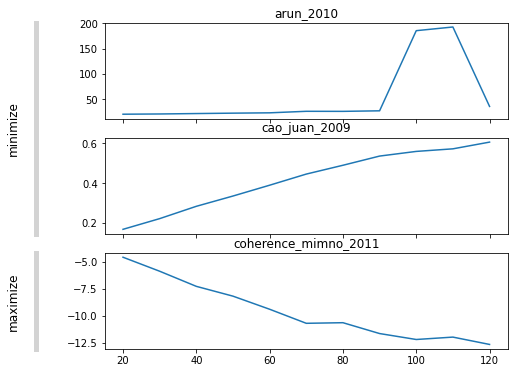

In [45]:
from tmtoolkit.topicmod.visualize import plot_eval_results

plot_eval_results(eval_results_by_topics);

In [47]:
best_tm = [m for k, m in eval_results_by_topics if k == 20][0]['model']

best_tm.n_topics, best_tm.alpha, best_tm.eta  # just to make sure

(20, 0.05, 0.1)

In [49]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_bg = doc_lengths(dtm)
topic_labels = generate_topic_labels_from_top_words(
    best_tm.topic_word_,
    best_tm.doc_topic_,
    doc_lengths_bg,
    vocab,
    lambda_=0.6
)

topic_labels[:10]   # showing only the first 5 topics here

array(['1_show', '2_post', '3_face', '4_', '5_late', '6_dr', '7_organism',
       '8_deal', '9_alien', '10_car'], dtype='<U12')

In [54]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words

top_topic_word = ldamodel_top_topic_words(best_tm.topic_word_,
                                          vocab,
                                          row_labels=topic_labels)
top_topic_word[top_topic_word.index == '1_show']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
1_show,show (0.009259),occur (0.008116),example (0.006973),event (0.006973),biblical (0.00583),jesus (0.00583),build (0.00583),consider (0.00583),bible (0.00583),cause (0.00583)


In [50]:
from tmtoolkit.topicmod.model_stats import marginal_topic_distrib

marg_topic = marginal_topic_distrib(best_tm.doc_topic_, doc_lengths_bg)
marg_topic

array([0.03165, 0.01595, 0.01778, 0.65498, 0.02572, 0.007  , 0.03213,
       0.01219, 0.01298, 0.01213, 0.03306, 0.01473, 0.01219, 0.02742,
       0.01619, 0.01068, 0.01434, 0.01383, 0.02784, 0.0072 ])

In [51]:
# np.argsort() gives ascending order, hence reverse via [::-1]
topic_labels[np.argsort(marg_topic)[::-1][:5]]

array(['4_', '11_culture', '7_organism', '1_show', '19_allergy'],
      dtype='<U12')

In [56]:
from tmtoolkit.topicmod.model_stats import marginal_word_distrib

marg_word = marginal_word_distrib(best_tm.topic_word_, marg_topic)
vocab[np.argsort(marg_word)[::-1][:10]]

array(['', 'be', 'do', 'have', 'nt', 'it', 'i', 'in', 'make', 'but'],
      dtype='<U79')

In [57]:
from tmtoolkit.topicmod.model_stats import most_probable_words, least_probable_words

most_probable_words(vocab, best_tm.topic_word_,
                    best_tm.doc_topic_, doc_lengths_bg,
                    n=10)

array(['', 'be', 'do', 'have', 'nt', 'it', 'i', 'in', 'make', 'but'],
      dtype='<U79')

In [59]:
least_probable_words(vocab, best_tm.topic_word_,
                     best_tm.doc_topic_, doc_lengths_bg,
                     n=10)


array(['immemorial', 'things…', 'mandy', 'hit', 'fatherin',
       'superintelligences', 'negatively', 'arrive', 'magic', 'ketchum'],
      dtype='<U79')

In [60]:
from tmtoolkit.topicmod.evaluate import metric_coherence_mimno_2011

# use top 20 words per topic for metric
coh = metric_coherence_mimno_2011(best_tm.topic_word_, dtm, top_n=20)
coh

array([ -0.884  ,  -2.50281,  -3.77675,  -0.11246,  -0.91166, -14.99531,
        -1.00354,  -1.66555,  -3.03561,  -2.52442,  -0.85911,  -0.90084,
       -12.60548,  -0.68029,  -1.33867, -11.74474, -10.10062,  -4.1343 ,
        -0.814  , -17.28363])

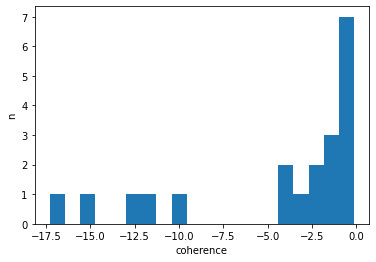

In [61]:
import matplotlib.pyplot as plt

plt.hist(coh, bins=20)
plt.xlabel('coherence')
plt.ylabel('n')
plt.show();

In [62]:
import numpy as np

top10_t_indices = np.argsort(coh)[::-1][:5]
bottom10_t_indices = np.argsort(coh)[:5]

topic_labels[top10_t_indices]

array(['4_', '14_age', '19_allergy', '11_culture', '1_show'], dtype='<U12')